___

 # <center>**STOCK PRICE PREDICTION**</center>

___

## **Importing Libraries**

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from datetime import timedelta

## **Preprocessing**

### Loading Stock Data from CSV File

In [86]:
file_path = r"Data.csv"
data = pd.read_csv(file_path)

### Making sure 'Date' column is in datetime format

In [89]:
data['Date'] = pd.to_datetime(data['Date'])

### Converting numeric columns to float, and removing unnecessary commas

In [92]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in numeric_columns:
    data[col] = data[col].astype(str).str.replace(',', '').astype(float)

### Deleting rows with empty value

In [95]:
data.dropna(inplace=True)

___

## **Descriptive statistics**

___

In [100]:
data.describe(include='all')

,Date,Open,High,Low,Close,Volume
count,1719,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000
mean,2021-02-09 05:36:45.235602176,350.779517,355.268935,345.452007,349.845666,70015.389180
min,2017-01-11 00:00:00,168.800000,171.000000,162.000000,169.400000,110.000000
25%,2018-11-16 12:00:00,245.000000,249.600000,241.000000,245.650000,18400.500000
50%,2021-05-04 00:00:00,354.000000,359.000000,349.000000,353.400000,40283.000000
75%,2023-02-18 00:00:00,437.500000,442.500000,428.000000,435.000000,88793.500000
max,2025-01-01 00:00:00,667.000000,678.000000,651.000000,667.000000,712865.000000
std,NaN,109.191878,110.822707,107.465802,108.875929,83856.202677


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1719 non-null   datetime64[ns]
 1   Open    1719 non-null   float64       
 2   High    1719 non-null   float64       
 3   Low     1719 non-null   float64       
 4   Close   1719 non-null   float64       
 5   Volume  1719 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 80.7 KB


In [104]:
data.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

### Defining Features as Independent Variables and Target as Dependent Variable

In [107]:
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'
X = data[features]
y = data[target]

___

# **Exploratory Data Analysis (EDA)**

___

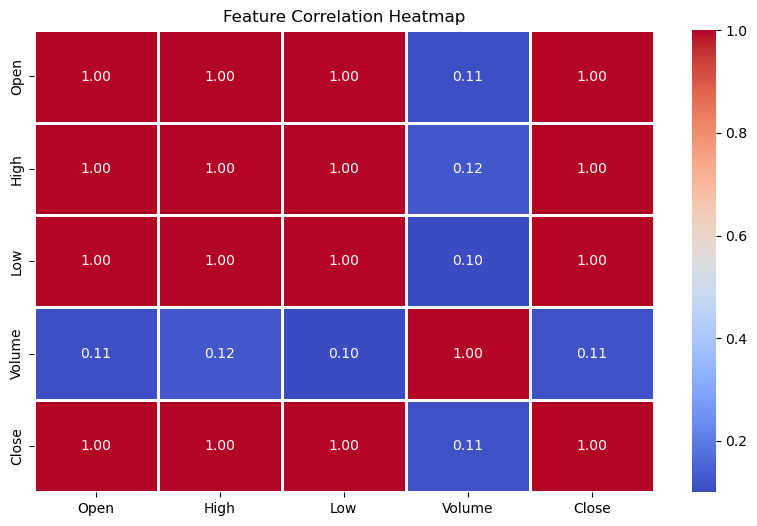

In [112]:
plt.figure(figsize=(10, 6))
sns.heatmap(data[features + [target]].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title("Feature Correlation Heatmap")
plt.show()

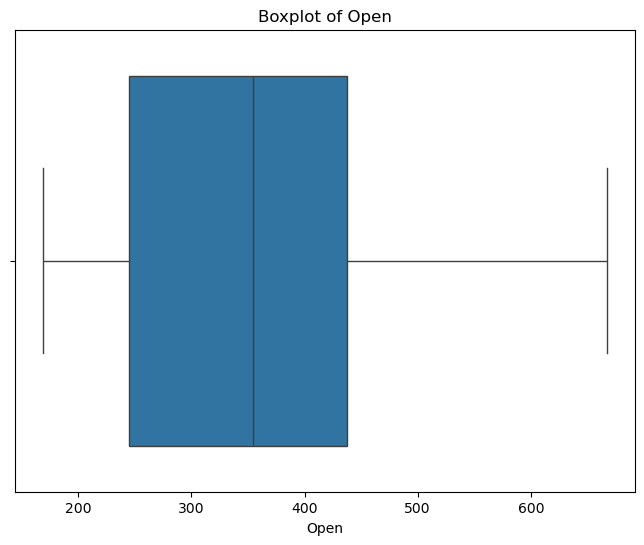

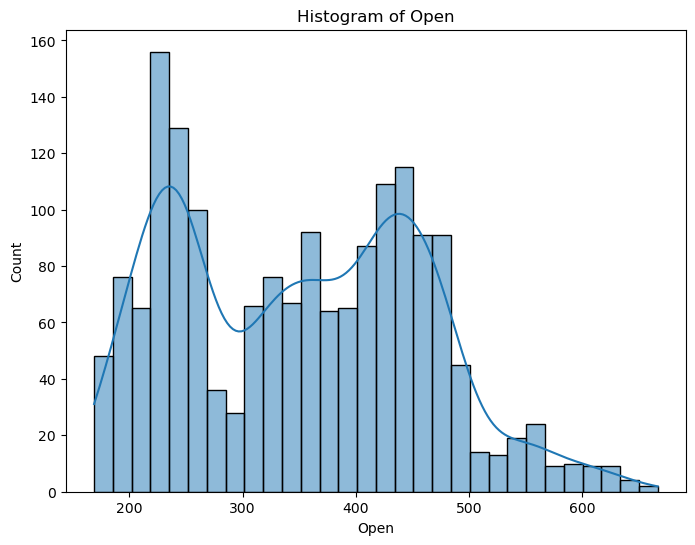

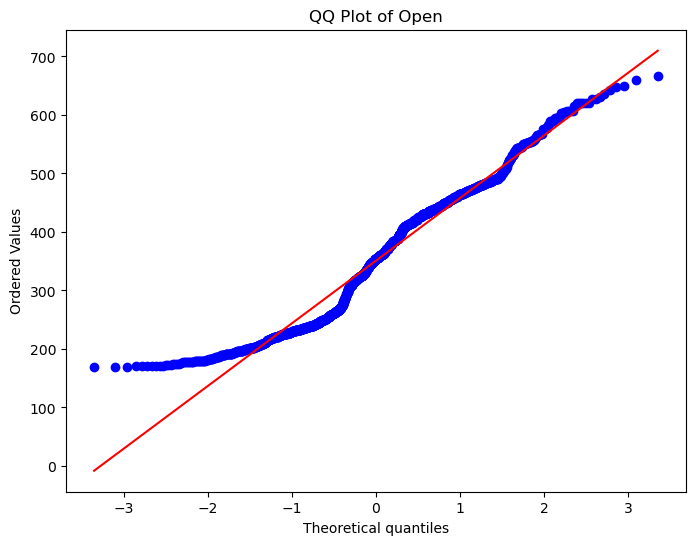

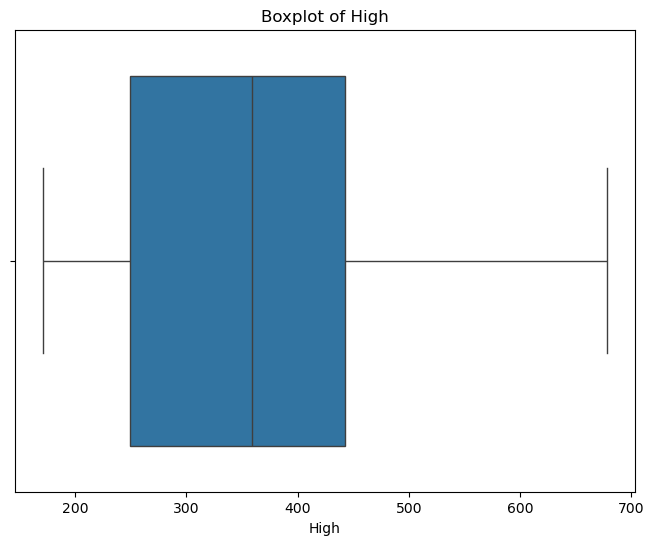

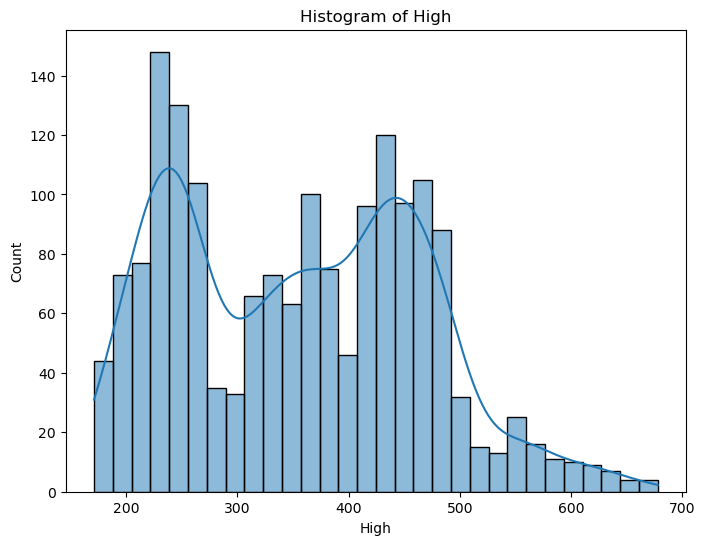

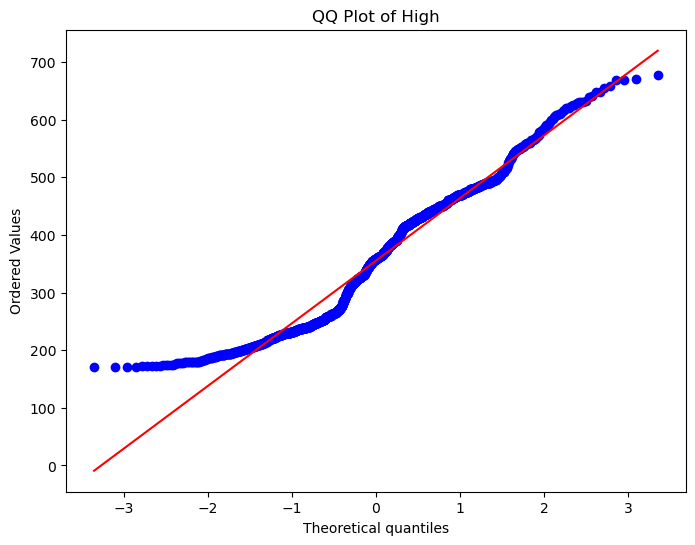

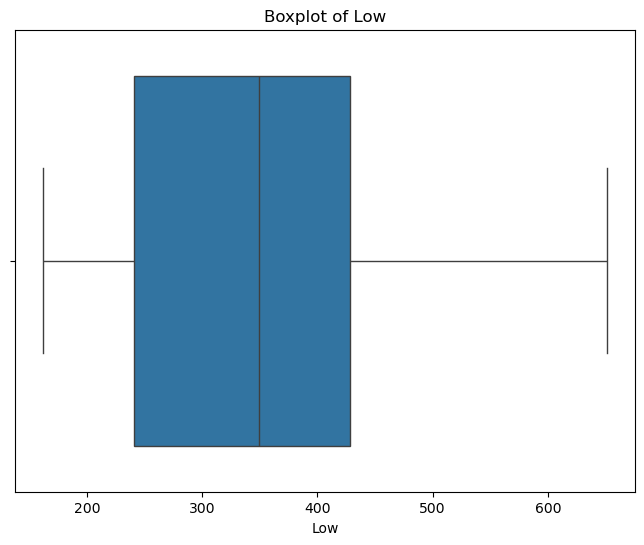

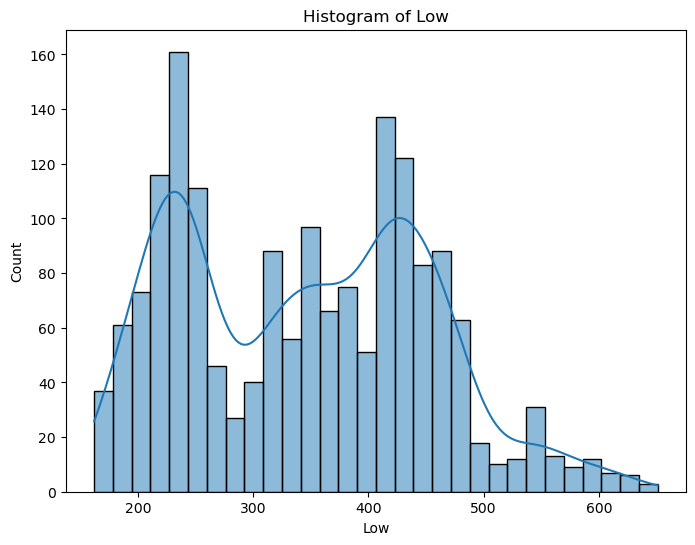

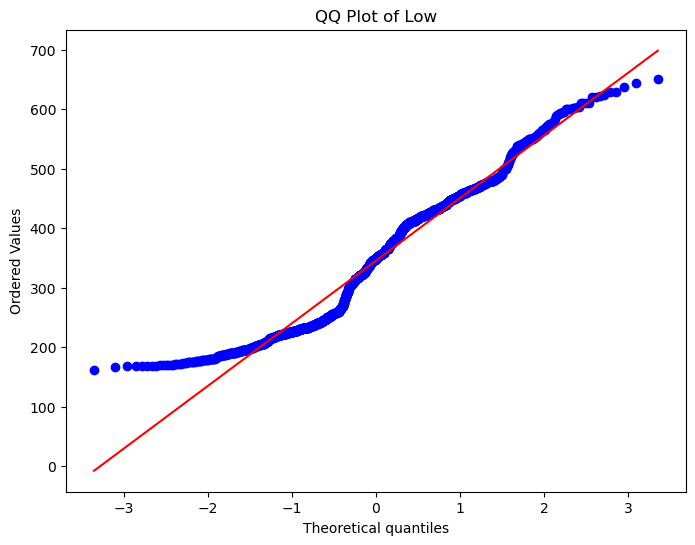

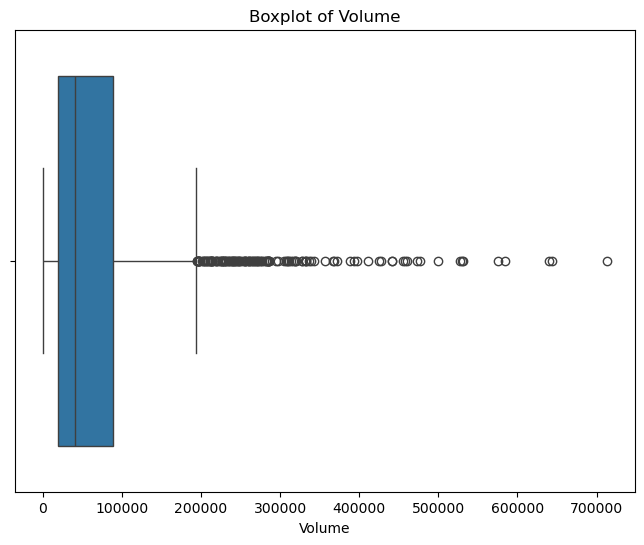

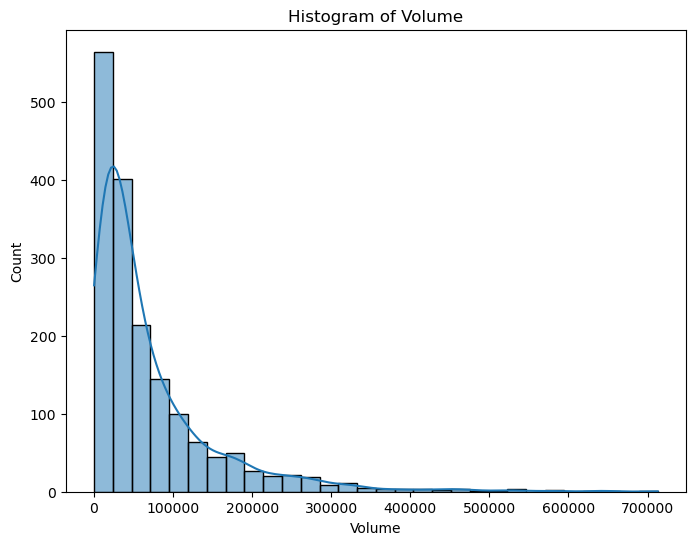

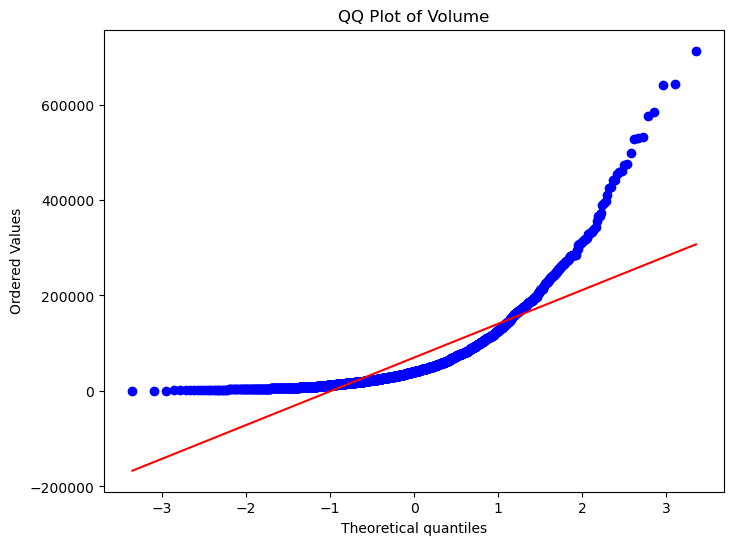

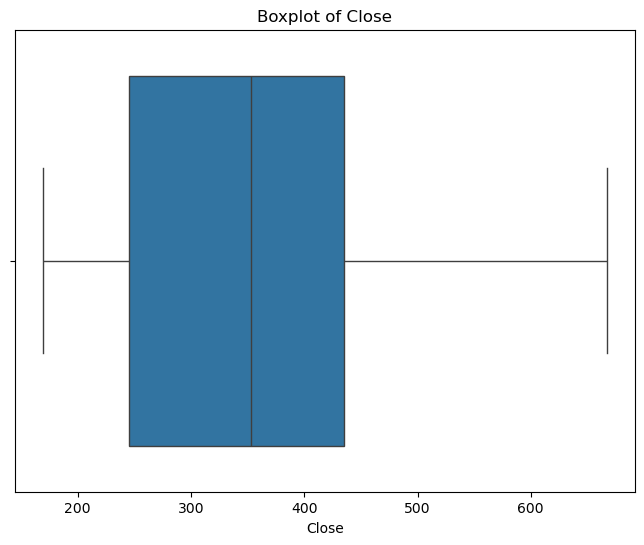

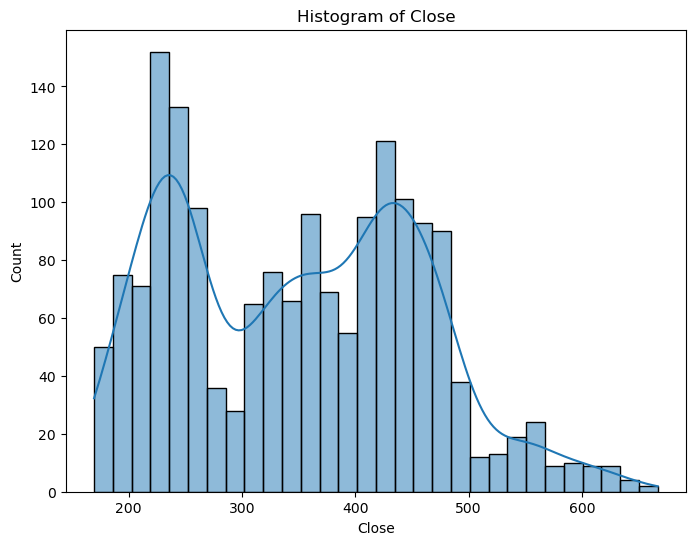

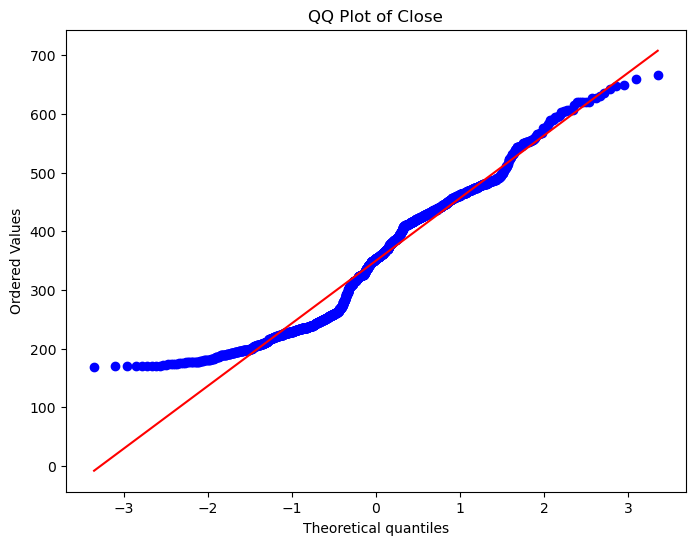

In [114]:
for column in features + [target]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()
    
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Histogram of {column}')
    plt.show()
    
    plt.figure(figsize=(8, 6))
    stats.probplot(data[column], dist="norm", plot=plt)
    plt.title(f'QQ Plot of {column}')
    plt.show()

### Train-Test Split (using 80% Train, 20% Test)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

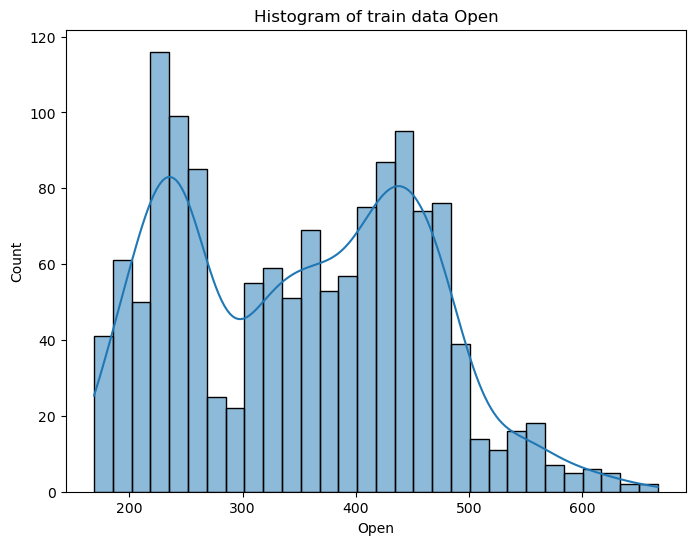

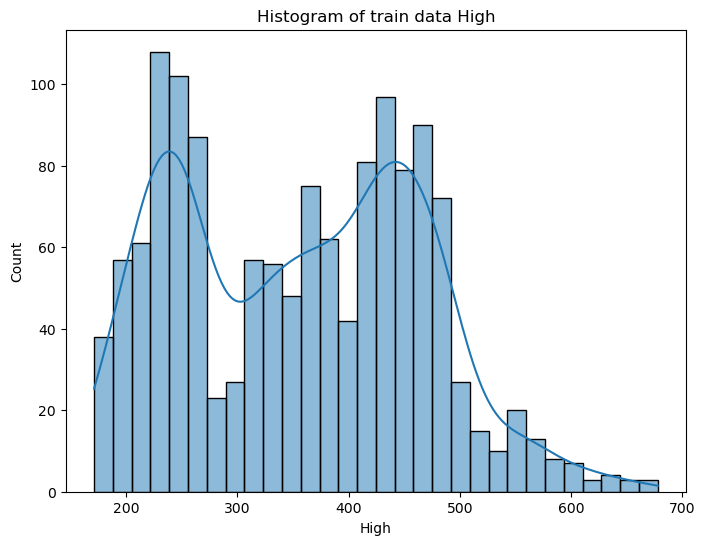

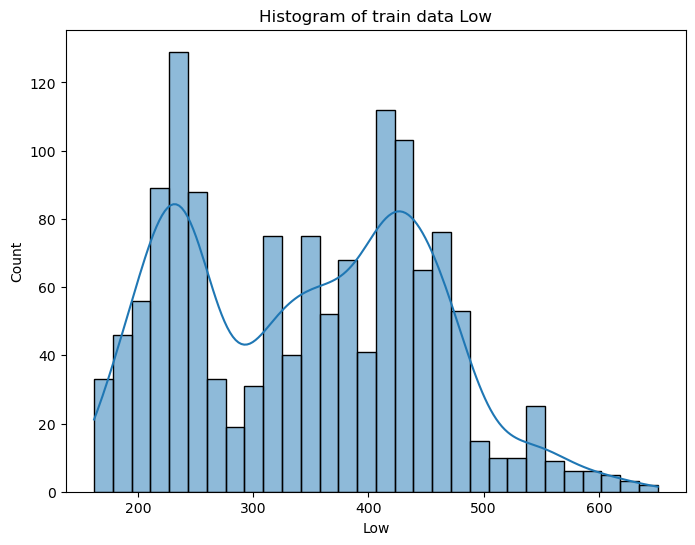

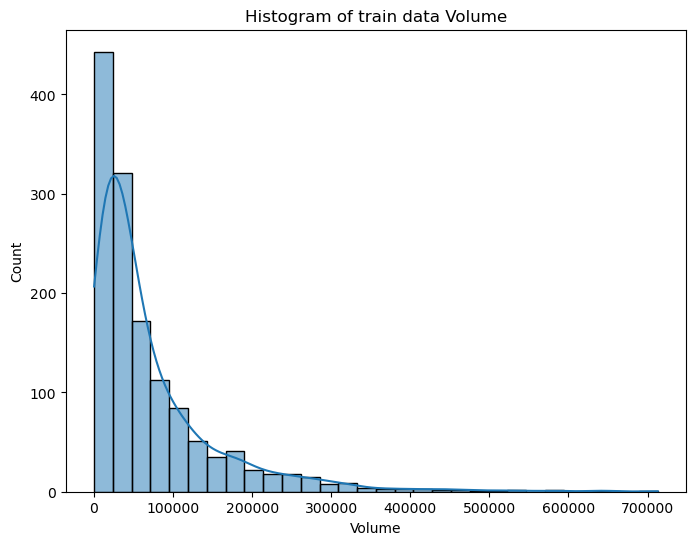

In [119]:
for column in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(X_train[column], kde=True, bins=30)
    plt.title(f'Histogram of train data {column}')
    plt.show()

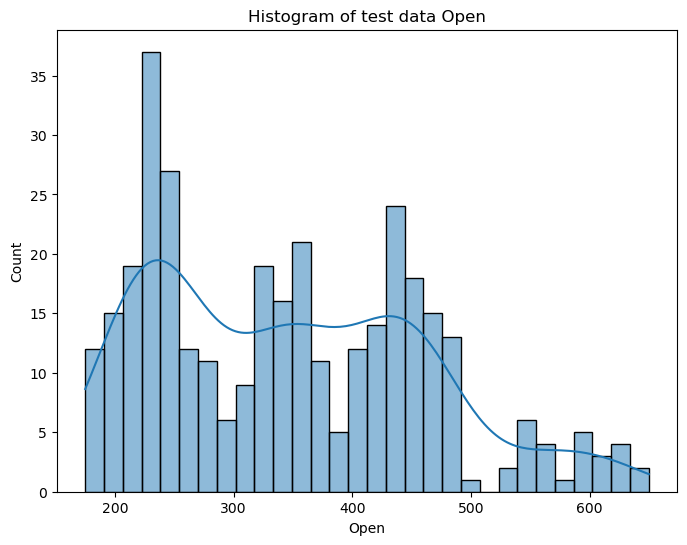

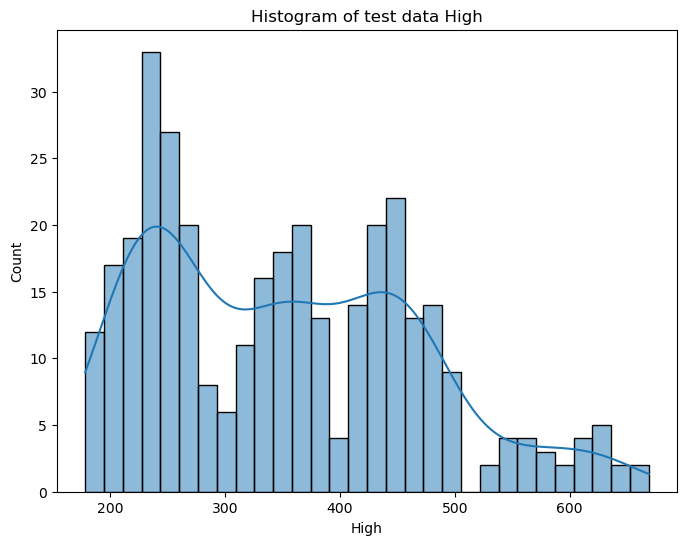

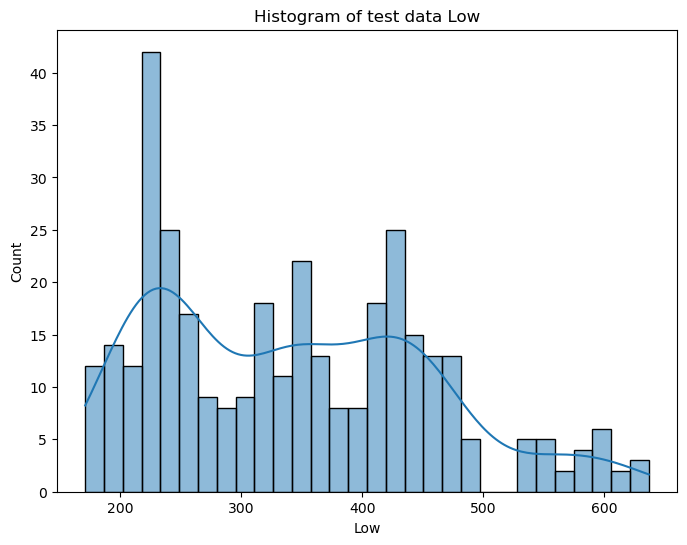

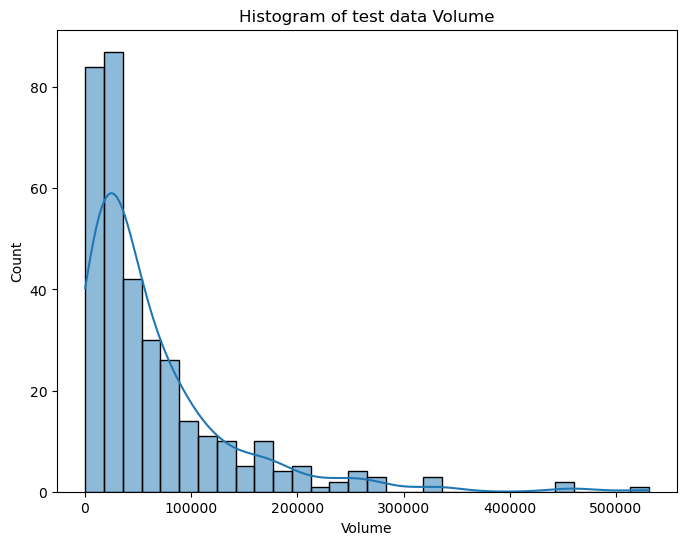

In [121]:
for column in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(X_test[column], kde=True, bins=30)
    plt.title(f'Histogram of test data {column}')
    plt.show()  

### Training the Linear Regression Model from Scikit-learn

In [124]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [126]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2,mse,mae

(0.9992232046500503, 10.187310002666285, 2.1964410521956084)

## **Plot Actual vs. Predicted Prices**

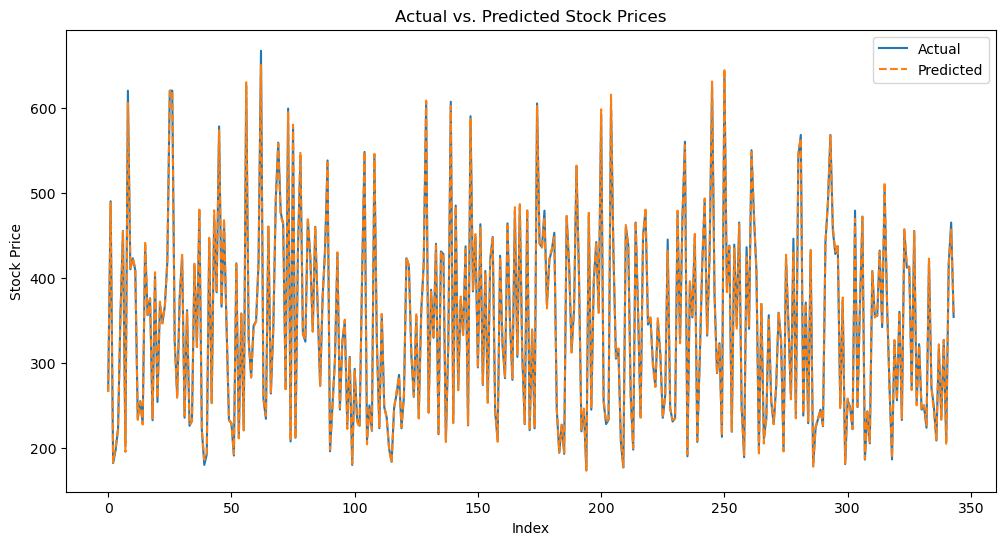

In [129]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", linestyle="-")
plt.plot(y_pred, label="Predicted", linestyle="--")
plt.xlabel("Index")
plt.ylabel("Stock Price")
plt.title("Actual vs. Predicted Stock Prices")
plt.legend()
plt.show()


In [131]:
df_results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
df_results.to_csv('actual_vs_predicted.csv', index=False)

In [133]:
data['Volume']

0       22273.0
1       73136.0
2       53794.0
3       77229.0
4       66351.0
         ...   
1714     3211.0
1715     1013.0
1716     3205.0
1717     9711.0
1718     5515.0
Name: Volume, Length: 1719, dtype: float64

In [137]:
mean_open = data["Open"].mean() + 10
median_high = data["High"].median() - 2
median_low = data["Low"].median()
median_volume = data["Volume"].median()

# Input for number of days into the future to predict
future_days = int(input("Enter the number of days into the future to predict: "))
last_date = data["Date"].max()
future_dates = [last_date + timedelta(days=i) for i in range(1, future_days + 1)]

# Generate random data with some variations
open_values = [mean_open + np.random.normal(0, 5) for i in range(future_days)]  # Random fluctuation around mean_open
high_values = [median_high + np.random.normal(0, 3) for i in range(future_days)]  # Random fluctuation around median_high
low_values = [median_low + np.random.normal(0, 2) for i in range(future_days)]  # Random fluctuation around median_low
volume_values = [median_volume + np.random.normal(0, 500) for i in range(future_days)]  # Random fluctuation around median_volume

# Create the future DataFrame
future_data = pd.DataFrame({
    "Date": future_dates,
    "Open": open_values,
    "High": high_values,
    "Low": low_values,
    "Volume": volume_values  
})

Enter the number of days into the future to predict:  200


In [139]:
future_data

,Date,Open,High,Low,Volume
0,2025-01-02,366.614073,358.836321,349.679813,40391.225643
1,2025-01-03,367.919488,354.532113,352.309564,40753.407724
2,2025-01-04,353.402778,360.937358,347.614936,40959.500010
3,2025-01-05,359.619711,354.265878,347.923075,40497.830560
4,2025-01-06,369.832634,360.796762,349.476293,40086.738420
...,...,...,...,...,...
195,2025-07-16,354.685265,352.339808,349.926981,41390.407520
196,2025-07-17,358.332054,356.309257,345.276319,40842.576805
197,2025-07-18,365.734339,357.451262,347.972428,40614.253517
198,2025-07-19,360.779048,352.430847,345.628564,40088.182264


In [141]:
future_predictions = model.predict(future_data.drop('Date',axis=1))

In [143]:
df_future = pd.DataFrame({'Date': future_dates, 'Predicted Price': future_predictions})

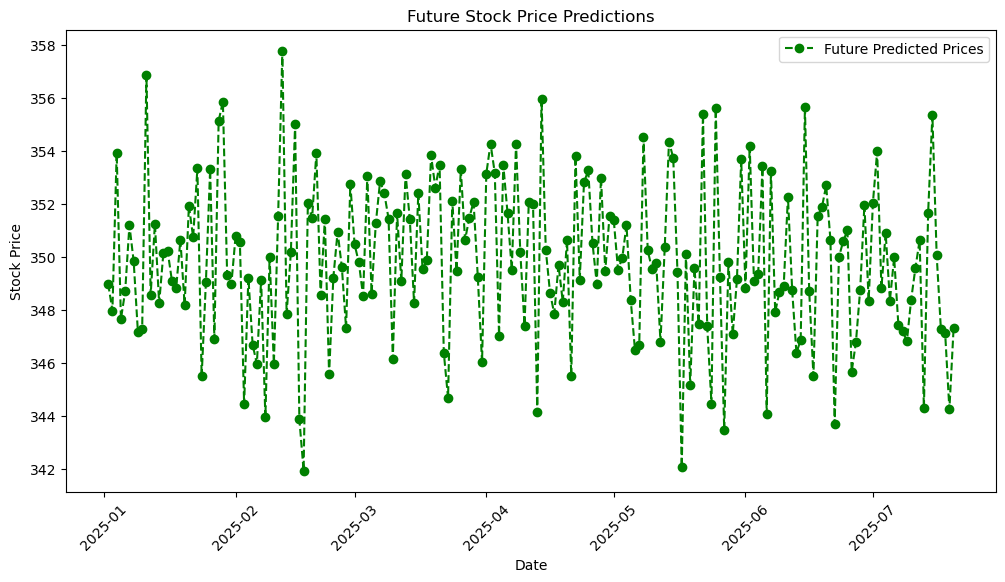

In [145]:
plt.figure(figsize=(12, 6))
plt.plot(df_future['Date'], df_future['Predicted Price'], marker='o', linestyle='--', color='green', label='Future Predicted Prices')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Future Stock Price Predictions")
plt.legend()
plt.xticks(rotation=45)
plt.show()


***

# ***<center>THE END</center>***

***